# Import libraries

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
data = pd.read_csv('data/train.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Explanation:

- **Data Preparation:** The code starts by loading the data into a NumPy array and shuffling it to ensure a random distribution of samples. This is important for reducing bias in the model training process.

- **Train-Test Split:** The data is then split into training and testing sets. The first 1000 samples are used for testing, and the rest are used for training. This separation is crucial for evaluating the model's performance on unseen data.

- **Feature and Label Extraction:** For both the training and testing sets, labels (Y) and features (X) are extracted. The labels are the first row of the dataset, and the features are the remaining rows.

- **Normalization:** The feature data is normalized by dividing by 255. This step is essential because the original data ranges from 0 to 255, and normalizing it to a range of 0 to 1 helps the neural network converge faster during training.

- **Shape Information:** The variable `m_train` stores the number of samples in the training set, which can be useful for iterating over the dataset during training.

In [15]:
data = np.array(data)
m, n = data.shape 
np.random.shuffle(data)

# Create train and test data
data_test = data[0:1000].T # 1000 samples for test
Y_test = data_test[0] # label
X_test = data_test[1:n] # data
X_test = X_test / 255. # normalize data data in the train set goes from 0 to 255. so divide by 255 to get the value between 0 and 1

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape # m_train is the number of samples in the train set

In [16]:
Y_train

array([1, 8, 5, ..., 4, 6, 0], dtype=int64)

In [17]:
X_train[:,0].shape

(784,)

### Explanation:

- **Initialization:** The `init_params` function initializes the weights and biases for the first and second layers of the neural network. The weights are randomly generated and then shifted to have values between -0.5 and 0.5.

- **Activation Functions:** The `ReLU` function is used as the activation function for the hidden layer, and the `softmax` function is used for the output layer.

- **Forward Propagation:** The `forward_prop` function calculates the activations for each layer using the current weights, biases, and inputs. This is essential for both making predictions and training the network.

- **One-Hot Encoding:** The `one_hot` function converts the labels into a one-hot encoded format, which is necessary for calculating the loss during training.

- **Backpropagation:** The `backward_prop` function calculates the gradients of the loss with respect to the weights and biases using the chain rule. This is crucial for updating the parameters of the network.

- **Parameter Update:** The `update_params` function updates the weights and biases using the gradients calculated in backpropagation. The learning rate `alpha` controls the size of the updates.

In [18]:
# we need to initialize our weights and bias
# crate randon weights and bias for the first and second layer and minus 0.5 to get the value between -0.5 and 0.5
def init_params():
    W1 = np.random.rand(16, 784) - 0.5
    b1 = np.random.rand(16, 1) - 0.5
    W2 = np.random.rand(10, 16) - 0.5
    b2 = np.random.rand(10, 1) - 0.5 
    return W1, b1, W2, b2

# ReLU activation function
def ReLU(Z):
    return np.maximum(Z, 0)

# softmax activation function
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

# forward propagation
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

# one hot encoding
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max()+1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y


# back progagation
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

# update weights and bias
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2
    

### Explanation:

- **Get Predictions:** The `get_predictions` function takes the output of the neural network (A2) and returns the index of the maximum value in each column, which corresponds to the predicted class.

- **Get Accuracy:** The `get_accuracy` function compares the predictions to the true labels (Y) and calculates the proportion of correct predictions. This is a common metric for evaluating classification models.

- **Gradient Descent:** The `gradient_descent` function is the main training loop. It initializes the parameters, then iteratively performs forward propagation, backpropagation, and parameter updates. The learning rate (`alpha`) controls the size of the updates, and the number of iterations determines how long the training process continues.

    - The accuracy of the model is printed every 50 iterations to monitor the progress of the training.

- **Return Values:** Finally, the trained weights and biases are returned, which can be used for making predictions on new data.

In [19]:
# get predictions
def get_predictions(A2):
    return np.argmax(A2, 0)

# get accuracy 
def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size


# desecent gradient
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 50 == 0:
            print("iteration:", i)
            print("accuracy:", get_accuracy(get_predictions(A2), Y))
    return W1, b1, W2, b2

### Explanation:

- **Running the Model:** This line of code initiates the training process of your neural network. The `gradient_descent` function is called with the training data (`X_train`, `Y_train`), a learning rate of `0.10`, and a total of `1000` iterations.

- **Training Parameters:**
  - **Learning Rate (`0.10`):** This value controls how much the weights and biases are updated during each iteration of gradient descent. A higher learning rate can speed up the training but might lead to instability, while a lower learning rate can result in more stable but slower training.
  - **Iterations (`1000`):** This is the number of times the training loop will run. More iterations allow the model more opportunities to learn from the data, but also increase the computational cost.

- **Output:** The trained weights (`W1`, `W2`) and biases (`b1`, `b2`) are returned and stored in their respective variables. These parameters can then be used to make predictions on new data or evaluate the model's performance on a test set.

In [20]:
# run the model
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 1000)

iteration: 0
[6 0 6 ... 6 0 6] [1 8 5 ... 4 6 0]
accuracy: 0.0672439024390244
iteration: 50
[1 1 3 ... 7 6 6] [1 8 5 ... 4 6 0]
accuracy: 0.35309756097560974
iteration: 100
[1 1 0 ... 7 6 0] [1 8 5 ... 4 6 0]
accuracy: 0.5666341463414634
iteration: 150
[1 1 0 ... 9 6 0] [1 8 5 ... 4 6 0]
accuracy: 0.747219512195122
iteration: 200
[1 1 0 ... 4 6 0] [1 8 5 ... 4 6 0]
accuracy: 0.8250487804878048
iteration: 250
[1 8 0 ... 4 6 0] [1 8 5 ... 4 6 0]
accuracy: 0.8542195121951219
iteration: 300
[1 8 0 ... 4 6 0] [1 8 5 ... 4 6 0]
accuracy: 0.8696829268292683
iteration: 350
[1 8 0 ... 4 6 0] [1 8 5 ... 4 6 0]
accuracy: 0.8791219512195122
iteration: 400
[1 8 0 ... 4 6 0] [1 8 5 ... 4 6 0]
accuracy: 0.8858048780487805
iteration: 450
[1 8 0 ... 4 6 0] [1 8 5 ... 4 6 0]
accuracy: 0.8911951219512195
iteration: 500
[1 8 0 ... 4 6 0] [1 8 5 ... 4 6 0]
accuracy: 0.8961219512195122
iteration: 550
[1 8 0 ... 4 6 0] [1 8 5 ... 4 6 0]
accuracy: 0.899829268292683
iteration: 600
[1 8 0 ... 4 6 0] [1 8 5 ... 

In [21]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [1]
Label:  1


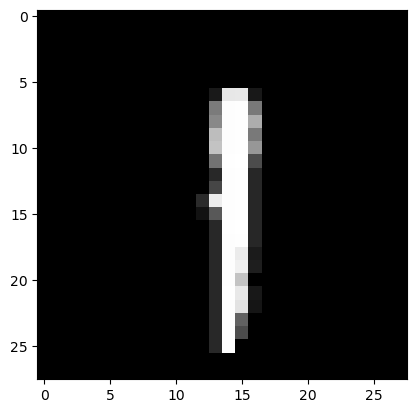

Prediction:  [8]
Label:  8


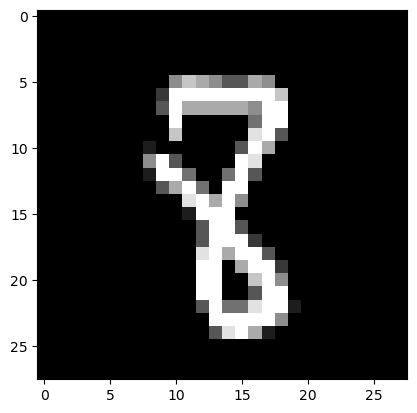

Prediction:  [0]
Label:  5


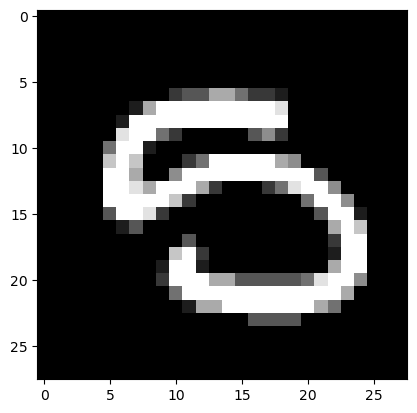

Prediction:  [4]
Label:  4


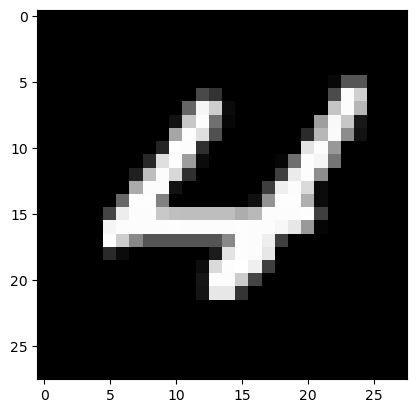

In [22]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [23]:
dev_predictions = make_predictions(X_test, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_test)

[9 5 9 5 8 7 3 7 7 8 6 2 1 0 0 1 2 8 3 8 8 0 4 2 8 3 6 0 7 5 4 8 6 0 9 0 4
 3 3 1 7 1 2 7 6 0 4 9 7 1 9 3 8 8 2 8 1 3 8 6 0 2 0 3 6 5 2 0 3 7 9 2 4 9
 1 1 0 8 2 0 8 1 1 3 8 2 5 6 1 5 5 4 2 2 2 5 0 5 1 7 1 0 1 7 6 9 8 9 2 5 3
 5 1 6 0 2 0 1 6 6 4 0 3 7 2 2 1 1 7 5 0 7 3 8 2 2 6 2 3 0 8 8 0 7 9 3 8 8
 0 8 7 0 2 4 3 8 6 3 2 5 0 1 6 2 9 9 3 8 6 3 0 5 8 3 3 3 9 5 7 9 5 3 6 6 9
 4 9 0 9 8 1 6 6 8 2 8 6 4 1 0 0 1 3 5 3 5 8 3 7 5 1 3 3 7 1 5 6 5 9 4 1 5
 6 4 9 2 3 2 4 8 3 1 7 1 4 0 7 8 9 0 3 4 6 4 3 5 8 3 2 8 5 3 8 6 0 3 3 5 8
 7 8 5 8 2 6 2 6 2 9 6 7 9 0 9 9 0 5 1 9 2 4 3 8 1 0 1 6 6 4 6 1 0 4 0 1 3
 9 4 3 2 9 0 7 8 3 7 1 7 3 7 6 8 6 7 3 3 2 9 4 3 8 5 9 9 2 6 4 4 5 8 3 2 3
 3 8 9 3 5 2 7 4 9 8 0 9 1 3 8 6 7 3 1 4 0 1 3 6 3 6 0 7 1 1 5 9 5 7 7 1 2
 2 0 1 8 4 2 3 1 2 7 7 2 5 6 5 1 3 0 7 3 2 9 7 7 6 6 2 4 8 4 9 1 6 6 7 2 5
 3 7 7 1 2 0 7 6 3 4 1 4 7 8 9 5 7 8 2 8 3 7 0 2 1 7 7 6 7 5 2 0 9 5 8 9 3
 2 7 1 3 3 1 7 4 2 9 6 6 8 1 0 7 3 6 6 2 4 1 7 4 5 9 0 1 2 0 7 5 4 1 6 2 2
 6 3 7 5 0 2 4 4 7 9 2 6 

0.91